<b>DOWNLOAD THE DAILY PRICE FOR FIVE SHARES AND PLOT IT</b>

In [1]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the instruments to download. We would like to see Lloyds, Vodafone, Barclays, Glencore & Tesco.
tickers = ['LLOY', 'VOD', 'BARC', 'GLEN', 'TSCO']

# Define which online source one should use.
#  Be careful since the Google Finance API has not been stable since late 2017
data_source = 'google'

# We would like all available data from 01/01/2014 until 12/31/2017.
start_date = '2014-01-01'
end_date = '2017-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)
close = close.fillna(method = 'ffill')
close.head(10)

C:\Users\ng284\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,BARC,GLEN,LLOY,TSCO,VOD
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,271.08,310.53,79.35,330.05,434.87
2014-01-03,272.85,307.50,79.93,330.50,432.12
2014-01-06,277.50,306.30,80.11,331.52,432.39
2014-01-07,280.95,308.85,82.51,331.75,436.15
2014-01-08,283.70,314.80,83.80,328.30,432.70
2014-01-09,284.25,309.65,85.26,320.00,432.12
2014-01-10,283.60,318.75,84.66,321.80,430.19
2014-01-13,291.70,318.95,83.76,326.55,428.54
2014-01-14,291.75,317.40,85.33,331.20,432.48


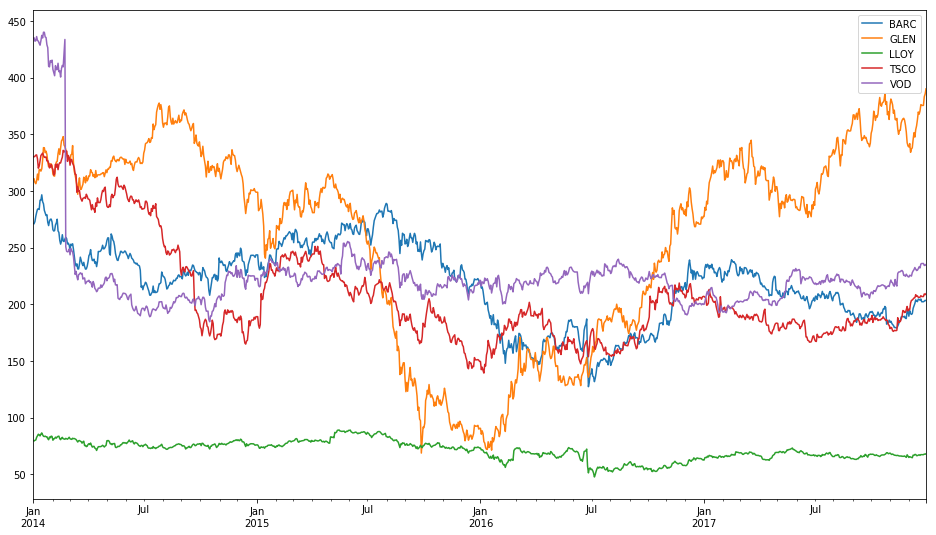

In [2]:
#Plot the data
close.plot(figsize=[16,9])

In [3]:
close.describe()

,BARC,GLEN,LLOY,TSCO,VOD
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,218.525979,261.229520,71.133109,207.896171,225.488829
std,35.377929,87.776145,8.343975,45.630759,39.708393
min,127.200000,68.620000,47.550000,139.200000,184.500000
25%,191.137500,185.100000,65.900000,177.712500,209.062500
50%,223.900000,292.400000,72.155000,191.325000,220.250000
75%,245.347500,326.280000,76.800000,224.787500,227.837500
max,296.500000,390.000000,89.000000,335.750000,440.000000


<b>COMPARE THE DAILY PRICE OF A STOCK TO ITS ROLLING AVERAGE</b>

C:\Users\ng284\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


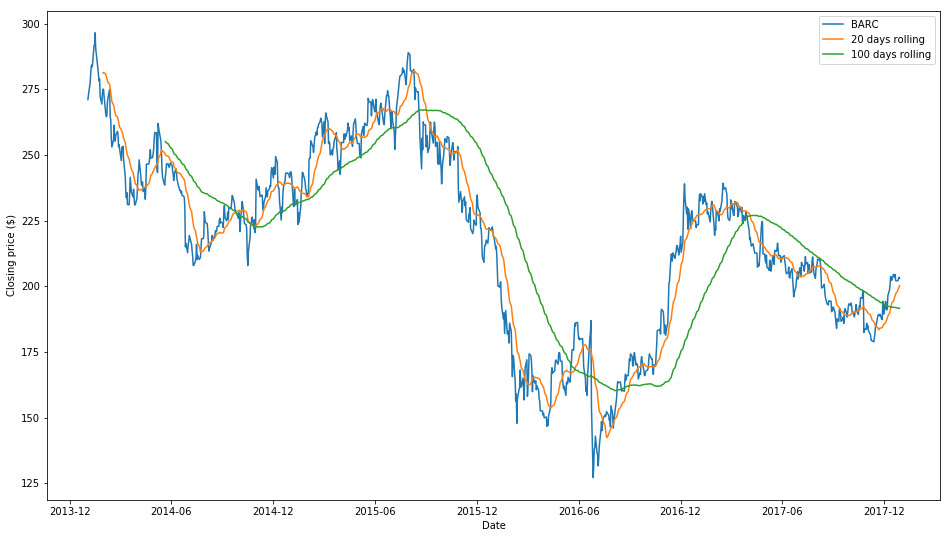

In [4]:
# Get the BARC time series. This now returns a Pandas Series object indexed by date.
barc = close.ix[:, 'BARC']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_barc = barc.rolling(window=20).mean()
long_rolling_barc = barc.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(1,1,1)
ax.plot(barc.index, barc, label='BARC')
ax.plot(short_rolling_barc.index, short_rolling_barc, label='20 days rolling')
ax.plot(long_rolling_barc.index, long_rolling_barc, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()

<B>CALCULATE RETURNS AND LOG RETURNS AN PLOT THEM</B>

In [5]:
# Relative returns
returns = close.pct_change(1)
returns.describe()

,BARC,GLEN,LLOY,TSCO,VOD
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,-0.000086,0.000725,-0.000001,-0.000257,-0.000384
std,0.019363,0.031628,0.016935,0.019087,0.018506
min,-0.176785,-0.294178,-0.209979,-0.103223,-0.421768
25%,-0.009459,-0.012955,-0.007825,-0.010366,-0.006651
50%,0.000000,0.000210,0.000000,-0.000254,0.000000
75%,0.009408,0.014151,0.007625,0.009318,0.006803
max,0.082004,0.210526,0.135691,0.149725,0.054060


In [6]:
returns.skew()

BARC    -1.298729
GLEN    -0.205874
LLOY    -1.305584
TSCO     0.560195
VOD    -11.340830
dtype: float64

In [7]:
returns.kurtosis()

BARC     13.838951
GLEN     13.470806
LLOY     28.863577
TSCO      6.790793
VOD     258.320998
dtype: float64

In [8]:
# Log returns - First the logarithm of the prices is taken and then the difference of consecutive (log) observations
log_returns = np.log(close).diff()
log_returns.describe()

,BARC,GLEN,LLOY,TSCO,VOD
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,-0.000277,0.000219,-0.000147,-0.000438,-0.000591
std,0.019668,0.031971,0.017201,0.019019,0.021445
min,-0.194538,-0.348392,-0.235696,-0.108948,-0.547779
25%,-0.009504,-0.013040,-0.007855,-0.010421,-0.006673
50%,0.000000,0.000210,0.000000,-0.000254,0.000000
75%,0.009364,0.014052,0.007597,0.009275,0.006780
max,0.078815,0.191055,0.127242,0.139523,0.052649


In [9]:
log_returns.skew()

BARC    -1.765019
GLEN    -1.047089
LLOY    -2.153341
TSCO     0.327967
VOD    -15.996589
dtype: float64

In [10]:
log_returns.kurt()

BARC     18.346551
GLEN     18.750910
LLOY     38.815710
TSCO      6.090639
VOD     407.671763
dtype: float64

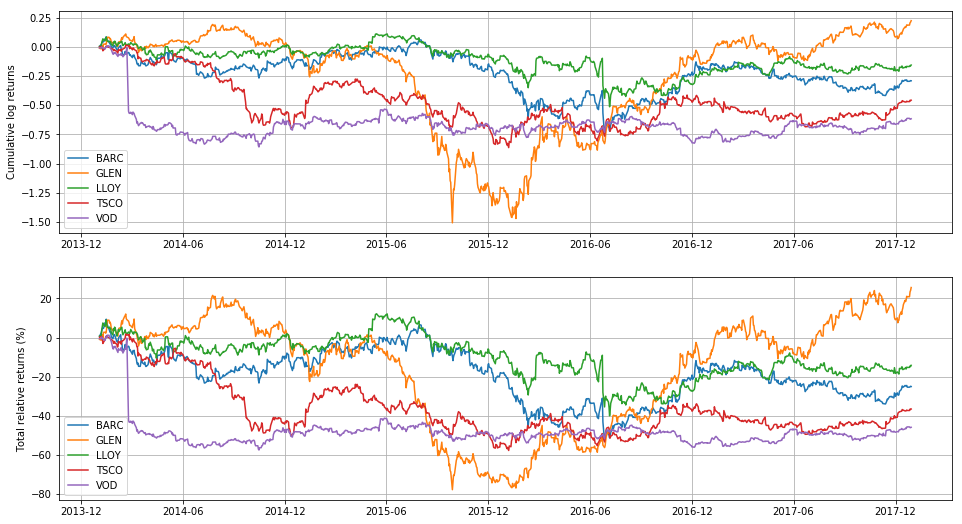

In [11]:
#Plotting both the log_returns and the returns

fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

#Calculating the total relative return c_relative(t) as  c_relative(t) = exp(c(t)) - 1, where c(t) are the log returns
for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

plt.show()

<B>MONTECARLO SIMULATION FOR ONE SHARE</B>

C:\Users\ng284\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\ng284\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


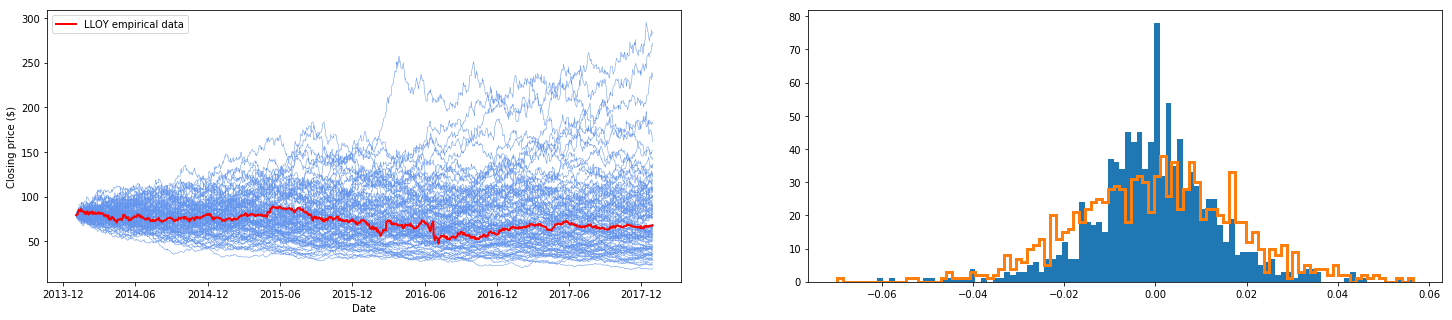

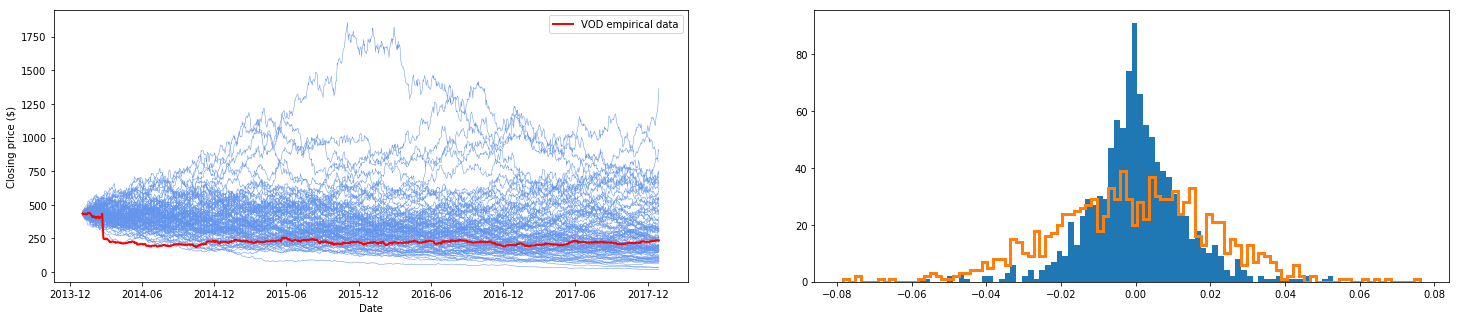

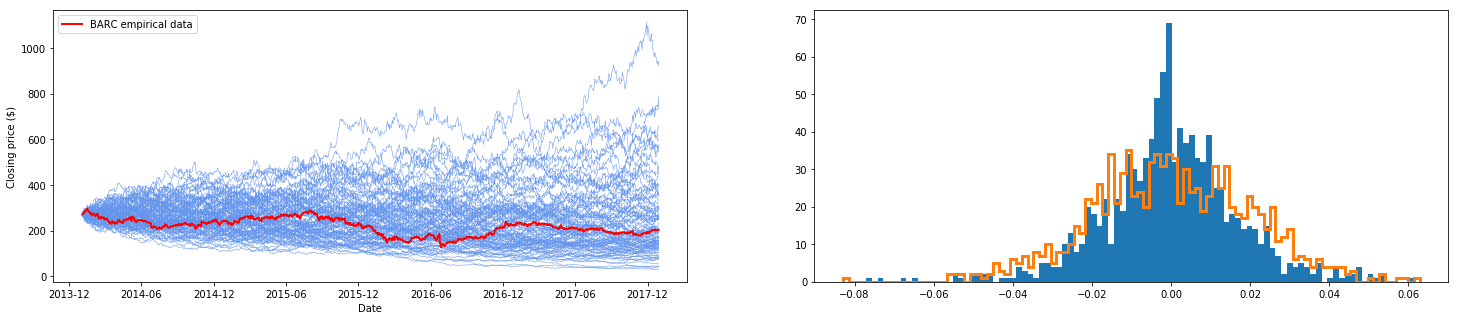

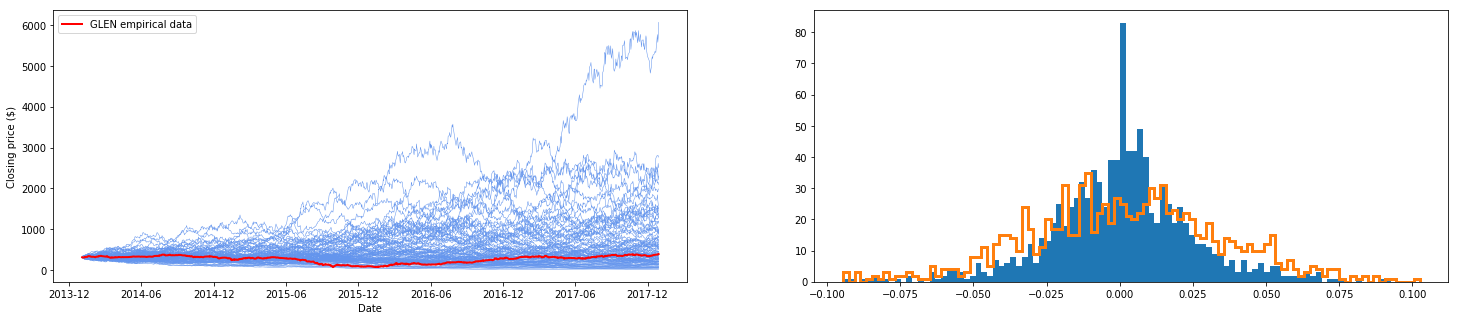

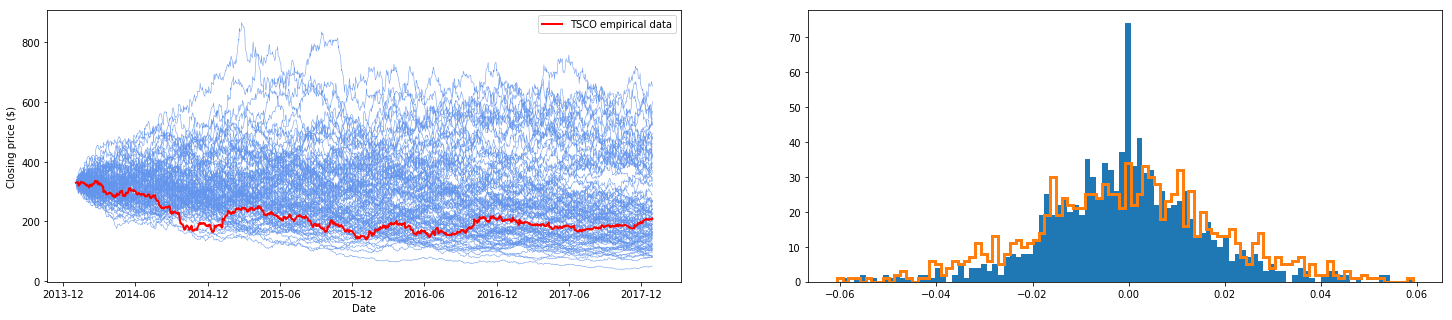

In [46]:
for lab in tickers:
    n = log_returns[lab].count()
    m = log_returns[lab].mean()
    s =log_returns[lab].std()
    p0 =close[lab][1]

    #Simulate the returns and the comulative (log) returns
    def comreturns(s,n,m):
        sim_returns = pd.Series(s*np.random.randn(n) + m)
        sim_comreturns = sim_returns.cumsum()
        return sim_returns, sim_comreturns

    #Price simulation
    tsco = close[lab]
    montecarlo = []

    for a in range(100):
        sim_returns, sim_comreturns = comreturns(s,n,m)
        sim_p = tsco[1]*np.exp(sim_comreturns)
        montecarlo.append(sim_p)

    #Comparison
    fig = plt.figure(figsize=[25,5])
    ax = fig.add_subplot(121)
    for a in range(100):
        ax.plot(tsco.index[2:], montecarlo[a], linewidth = 0.5, color = 'cornflowerblue')
    ax.plot(tsco.index, tsco,  label= lab + ' empirical data',color = 'r', linewidth=2.0)
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing price ($)')
    ax.legend()
    ax1 = fig.add_subplot(122)
    ax1.hist(log_returns[lab],bins = 100, range = [min(sim_returns), max(sim_returns)])
    ax1.hist(sim_returns[2:], bins=100, histtype = 'step', linewidth = 3)